In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import pacf

E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("../input/wind_dataset_imputed_and_scaled2.csv")
df['DATE']=pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,IND_0,IND_1,IND_4,IND.1_0.0,IND.1_1.0,IND.1_2.0,IND.1_4.0,IND.2_0.0,IND.2_1.0,IND.2_2.0,IND.2_3.0,IND.2_4.0
DATE,,,,,,,,,,,,,,,,,
1961-01-01,0.450115,0.002985,0.356877,0.515254,0.443709,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-02,0.378663,0.076119,0.271375,0.532203,0.513245,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-03,0.370431,0.005970,0.208178,0.406780,0.460265,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-04,0.284162,0.002985,0.211896,0.403390,0.370861,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-05,0.392493,0.155224,0.271375,0.338983,0.228477,1,0,0,1,0,0,0,0,1,0,0,0


In [3]:
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

In [4]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [5]:
n_past = 5
n_future = 1
n_features = 17

In [6]:
X_train, y_train = split_series(train_df.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test_df.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [7]:
X_test = X_test.reshape(1968,17*5)
X_train = X_train.reshape(4596,17*5)

In [12]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=50)
model.fit(X_train, y_train)
    
predictions = model.predict(X_test)
predictions

array([0.15905738, 0.19315892, 0.3789474 , ..., 0.50426143, 0.25198016,
       0.41454917], dtype=float32)

### real

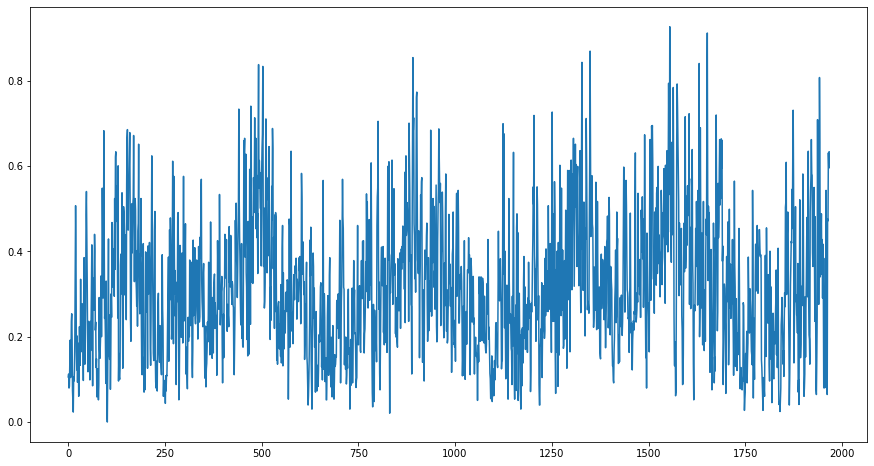

In [13]:
plt.figure(figsize=(15,8))
plt.plot(y_test[:,0,0])

### predicted

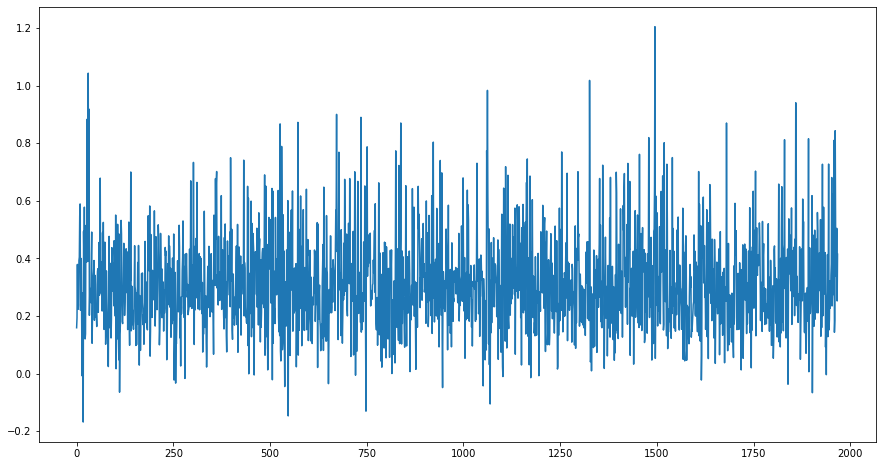

In [14]:
plt.figure(figsize=(15,8))
plt.plot(predictions)

In [15]:
mean_absolute_error(predictions,y_test[:,0,0])

0.18133215991333104